# Explorations on ergodicity and random processes

Notes for:

- [Ergodicity Economics](https://ergodicityeconomics.com/lecture-notes/) - _Peters_
- [Optimal leverage from non-ergodicity](https://www.tandfonline.com/doi/abs/10.1080/14697688.2010.513338) - _Peters_
- [Leverage Efficiency](https://arxiv.org/abs/1101.4548)- _Peters & Adamou_
- [Evaluating gambles using dynamics](https://doi.org/10.1063/1.4940236) - _Peters & Gell-Mann_
- [Insurance makes wealth grow faster](https://arxiv.org/abs/1507.04655) - _Peters & Adamou_

When considering gambles, defined as a set of payouts associated with a probability distribution, intuition would suggest that we should calculate the [expected value](https://en.wikipedia.org/wiki/Expected_value), understood as taking the average after many (tending to infinity) realizations, and only enter such a gamble if this number is positive. Poker players and gamblers refer to this as making _positive EV plays_. In practice, they seek to optimize their change in wealth $\Delta x = x(t + \Delta t) - x(t)$.  
This seems sensible enough, until you consider games such as [this](https://en.wikipedia.org/wiki/St._Petersburg_paradox):

> A casino offers a game of chance in which a fair coin is tossed at each stage. The initial stake starts at $\$2$ and is doubled every time heads appears. The first time tails appears, the game ends and the player wins whatever is in the pot. Thus the player wins $\$2$ if tails appears on the first toss, $\$4$ if heads appears on the first toss and tails on the second, $\$8$ if heads appears on the first two tosses and tails on the third, and so on.  
> The player wins $\$2^k$ where $k$ is the number of coin tosses. What would be a fair price (i.e. a price at which you would feel indifferent taking the role of the gambler or the casino) to play such a game?

The expected value of such a game is

$$\mathbb{E} = \frac{1}{2} \cdot 2 + \frac{1}{4} \cdot 4 + \frac{1}{8} \cdot 8 + \dotsb = 1 + 1 + 1 + \dotsb = \infty$$

Should we be willing to pay any amount for the opportunity to play? Most people would not, even though the game has an infinite expected value.

The aforementioned paradox was studied by [Daniel Bernoulli](https://en.wikipedia.org/wiki/Daniel_Bernoulli) in a paper published in 1738 in the journal of the Imperial Academy of Science in St. Petersburg. In it, he introduced the [expected utility hypothesis](https://en.wikipedia.org/wiki/Expected_utility_hypothesis), which states that individual preferences concerning such gambles seek to maximise not the expected change in wealth, but the expected change in _utility_, which is a mathematical concept that captures the subjective value of wealth to the individual. Utility functions could differ between individuals, which gives much (perhaps too much) flexibility to the theory, at the cost of explanatory power. Typical choices for utilities include $\sqrt{x}$ and $\ln{x}$ that explain the fact that the increase in utility provided by a $\$$ is inversely proportional to the level of wealth.

Professor [Ole Peters](http://tuvalu.santafe.edu/~ole/), Fellow at the [London Mathematical Laboratory](http://www.lml.org.uk/), has studied random processes such as this under different dynamics (where wealth changes in additive or multiplicative increments) and has proposed an alternative approach, one that seeks to explain human decision making when faced with such risky propositions. Instead of taking into account the state space average of wealth, this paradigm focuses on the time-average of wealth which are most often **not equal**. This framework is generally useful in evaluating gambles, and delivers insights into questions of optimal leverage, the puzzle of insurance, the emergence of cooperation, and the dynamics of inequality.

In a nutshell:
> People just optimize what happens to their wealth over time.

#### A motivating example

Consider the following game

> Flip a coin:
> - heads -> increase your wealth by 60%
> - tails -> decrease your wealth by 50%

Let's define wealth as a function of time $x(t)$:

$$ x(t + \Delta t)=   \left\{
\begin{array}{ll}
      0.6 x(t) \text{ with probability 0.5}\\
      1.4 x(t) \text{ with probability 0.5}\\
\end{array} 
\right.$$

With $t$ being a discrete time variable that grows as we repeat the experiment.

We see that the expected value of the game is

$$\mathbb{E}(x(t + \Delta t)) = 0.5 \cdot 0.6 x(t) - 0.5 \cdot 0.4 x(t) = 0.1 x(t)$$

This makes it a positive **EV** game.

We'll generate 100 draws from a uniform distribution $[0,1)$, and call every value > 0.5 heads, and tails for the rest.  
Our initial wealth $x(t) = \$ 1000$

In [2]:
import numpy as np

np.random.seed(123456789)

def generate_factors(steps=100):
    """Generate wealth factors for the experiment.
    Heads => 1.4
    Tails => 0.6
    """
    draws = np.random.rand(steps)
    factors = np.where(draws > 0.5, 1.4, 0.6)
    factors[0] = 1 # Factor at initial time step
    
    return factors
    
def final_wealth(factors, initial_wealth):
    return np.multiply.reduce(factors, initial=initial_wealth)

initial_wealth = 1000
factors = generate_factors(100)

print(final_wealth(factors, initial_wealth))

0.05010250985373571


Surpisingly, our wealth goes to 0 as we repeat the experiment, with
$$\lim_{T\to\infty} x(t + T \Delta t) = 0$$

We can plot the evolution of our wealth with time.

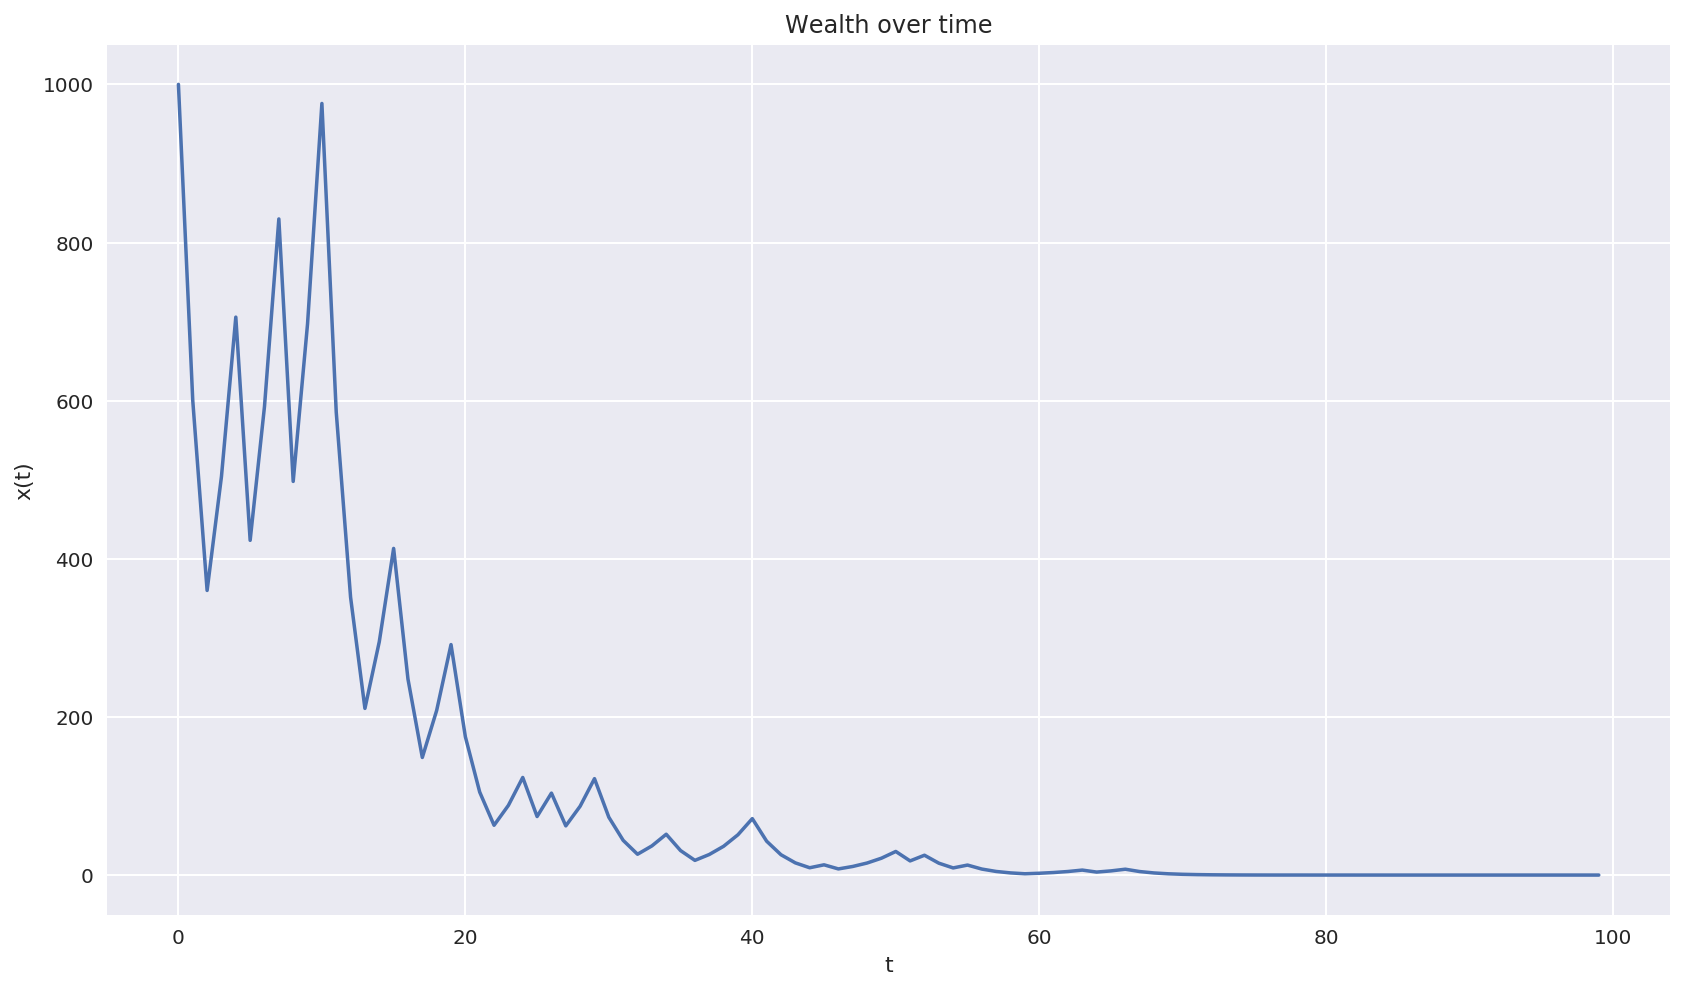

In [3]:
%config InlineBackend.figure_format="retina"
%matplotlib inline

import matplotlib.pyplot as plt


plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (14, 8)


def wealth_over_time(factors, initial_wealth):
    """Returns np.array of wealth over time"""
    return factors.cumprod() * initial_wealth

factors = generate_factors(100)
plt.plot(wealth_over_time(factors, initial_wealth))
plt.title("Wealth over time")
plt.xlabel("t")
plt.ylabel("x(t)");

Let's plot more realizations of the experiment.

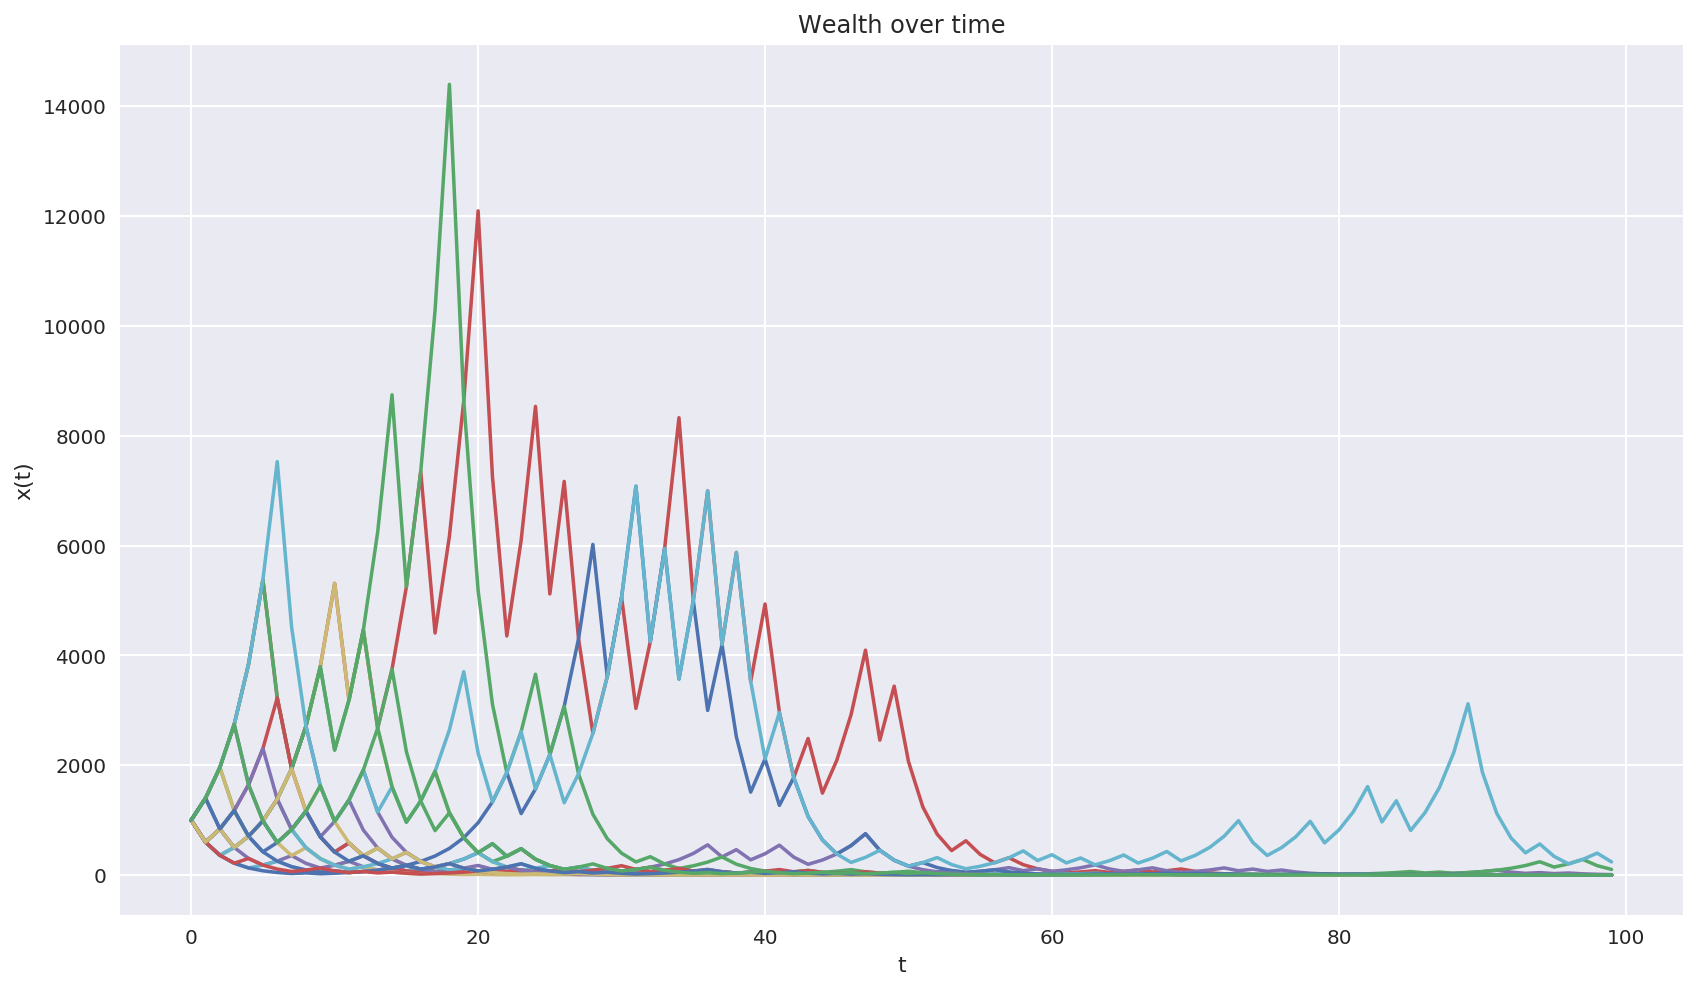

In [4]:
factors = [generate_factors(100) for _ in range(20)]
wealth = [wealth_over_time(factor, initial_wealth) for factor in factors]

for x in wealth:
    plt.plot(x)

plt.title("Wealth over time")
plt.xlabel("t")
plt.ylabel("x(t)");

There is high variance in the short term, but over the long run we see that realizations tend to 0 as $t$ grows.
<br>
What is happening here is that as $T$ increases:

$$\lim_{t + T \Delta t\to\infty} x(t + T \Delta t) = 1.4^{T/2} 0.6^{T/2} = (1.4 \cdot 0.6)^{T/2} = 0.84^{T/2} = 0$$

We see that this game, which has a positive expected value, has a _time average_ value of 0.  
We say that such systems are **non ergodic**, that is, they behave differently when averaged over time as averaged over the space of all possible states.

## _Insurance makes wealth grow faster_

Ole Peters, Alexander Adamou  
last revised 13 Jul 2017  
https://arxiv.org/abs/1507.04655

This paper tries to answer Kenneth Arrow's observation: _why does insurance exist?_  
In a world without arbitrage oportunities (assuming buyer and seller of insurance contracts have the same information), the insurer cannot charge more than the net premium (i.e. the expectation value of any future claims made by the buyer of the contract). Likewise, the buyer should not be willing to pay more than the premium.

Given that insurance is antisymmetric (what one party gains the other loses) and that the contracts should be priced exactly at the net premium, they should not exist.  
And yet they do.

#### To buy or not to buy insurance

Let's go through a simple case, considered in [Rothchild & Stiglitz 1976](academic.oup.com/qje/article-abstract/90/4/629/1886620).  
> A merchant sends a ship from St. Petersburg to Amsterdam. The safe delivery of the ship's cargo nets him $G = \$ 4,000$. With probability $p = 0.05$ the ship is sunk, and its replacement cost is $C = \$ 30,000$. The journey takes $\Delta t = 1$ month and the merchant's wealth at time $t$ is $W_{mer} = \$ 100,000$.  
> An insurer offers a contract that stipulates that, should the ship be lost, the merchant would receive the cost of the ship plus his lost profit $L = G + C$ for a fee of $F = \$ 1,800$.

Should the merchant buy the contract?

Under the expected-wealth paradigm, individuals try to maximise the rate of change of the expected value of their wealth.  
Define the rate of change in wealth as: 

$$\langle r \rangle = \frac{\langle \Delta W \rangle}{\Delta t} = \frac{\langle W(t + \Delta t) \rangle - W(t)}{\Delta t}$$

- Merchant's $\langle r_{mer}^{un} \rangle$ _without_ insurance:

$$\langle r_{mer}^{un} \rangle = (1 - p)G - p C = 0.95 \cdot \$ 4,000 - 0.05 \cdot \$ 30,000 = \$ 2,300$$

- Merchant's $\langle r_{mer}^{in} \rangle$_with_ insurance:

$$\langle r_{mer}^{in} \rangle = (1 - p)(G - F) + p(L - C - F) = G - F = \$ 4,000 - \$ 1,800 = \$ 2,200$$

The change in $\langle r_{mer} \rangle$ if the merchant were to buy insurance would be:

$$\delta \langle r_{mer} \rangle = \langle r_{mer}^{in} \rangle - \langle r_{mer}^{un} \rangle = - \$ 100$$

A negative expected change in $\langle r_{mer} \rangle$ means the merchant should **not** buy the insurance contract.

For the seller of insurances:

- Insurer's $\langle r_{ins}^{un} \rangle$ _without_ selling contract:

$$\langle r_{ins}^{un} \rangle = 0$$

- Insurer's $\langle r_{ins}^{in} \rangle$ _after_ selling contract:

$$\langle r_{ins}^{in} \rangle = F - p L = \$ 1,800 - 0.05 \cdot (\$ 30,000 + \$ 4,000)= \$ 100$$

The change in $\langle r_{ins} \rangle$ is:  
$$\delta \langle r_{ins} \rangle = \langle r_{ins}^{in} \rangle - \langle r_{ins}^{un} \rangle = \$ 100$$

The insurer stands to gain $ \$ 100$ per contract sold. Note that it is the same amount that the merchant would lose if he entered the contract.  

$$\delta \langle r_{ins} \rangle = - \delta \langle r_{mer} \rangle$$

In [18]:
# Given constants
W_mer = 100000
G = 4000
C = 30000
L = G + C
p = 0.05

def delta_r_merchant(fee):
    return (p * L - fee)

def delta_r_insurer(fee):
    return -delta_r_merchant(fee)

def plot_deltas(delta_r_merchant, delta_r_insurer, fee=1800, params={}):
    fees = np.linspace(1500, 2000, num=2100)
    plt.plot(fees, delta_r_merchant(fees), label="Merchant")
    plt.plot(fees, delta_r_insurer(fees), label="Insurer")
    plt.axhline(y=0, color="k", linewidth=1)
    plt.axvline(x=fee, linestyle="--", color="r", label="Fee")
    
    intercept_mer = delta_r_merchant(fee)
    plt.plot(fee, intercept_mer, color="k", marker="X")
    plt.text(fee+5, intercept_mer+0.005, round(intercept_mer, 3))
    
    intercept_ins = delta_r_insurer(fee)
    plt.plot(fee, intercept_ins, color="k", marker="X")
    plt.text(fee+5, intercept_ins-0.005, round(intercept_ins, 3))

    plt.title(params["title"]) if "title" in params else ""
    plt.ylabel(params["ylabel"]) if "ylabel" in params else ""
    plt.xlabel("insurance fee")
    plt.legend()
    plt.ylim(top=params["ylim"][0], bottom=params["ylim"][1]) if "ylim" in params else (-100, 100)
    plt.show()

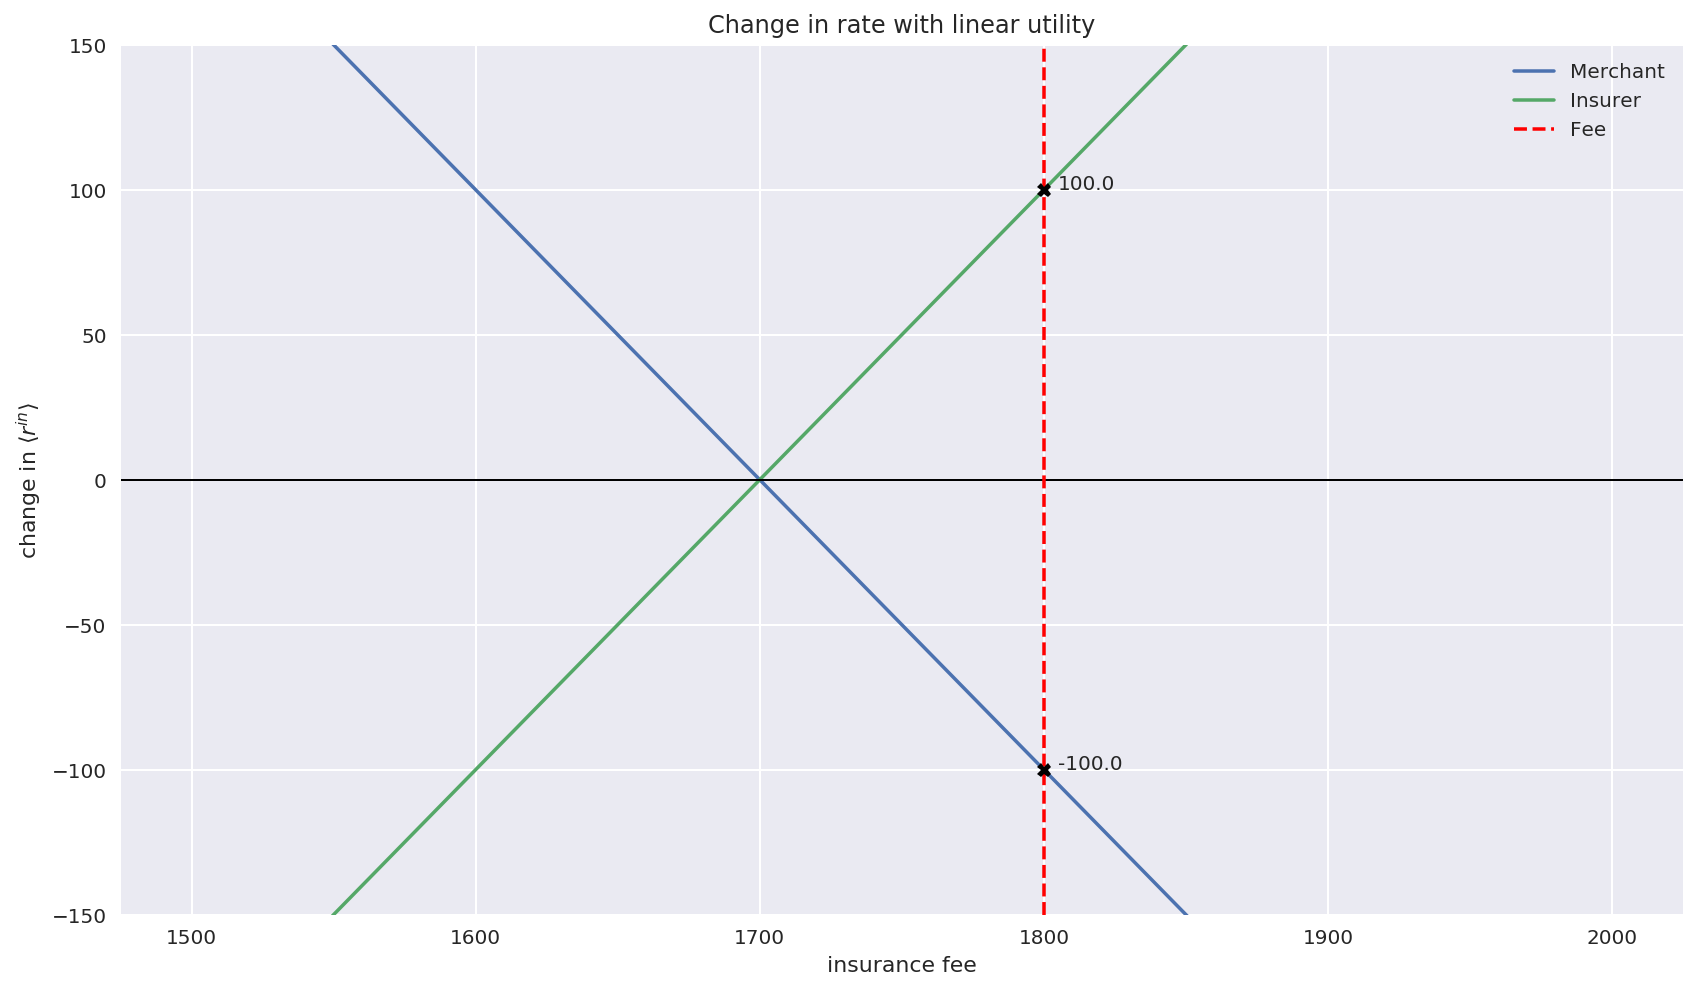

In [19]:
params = {"title": "Change in rate with linear utility",
          "ylabel": r"change in $\langle r^{in} \rangle$",
          "ylim": (150, -150)}

plot_deltas(delta_r_merchant, delta_r_insurer, params=params)

### Utility functions and the utility maximisation paradigm

Classical economic theory gets around this problem by introducing non linear **utility functions**, that map wealth to _happiness_ or _well being_ levels. The general idea is that one unit of wealth (i.e. one dollar) does not provide the same level of happiness to a millionaire than to a poor person.  
Under this framework, rational agents act in a manner that maximises their rate of change of _utility_, which could be different for each agent. Thus, it is possible that insurance can provide positive utility for _both_ insurer and buyer.

If we stipulate a square root utility $U(W) = \sqrt{W}$ for both insurer and merchant, then the following holds:  

- Merchant's $\langle r_{u} \rangle_{mer}^{un}$ _without_ insurance:

$$\langle r_{u} \rangle_{mer}^{un} = (1 - p) U_{mer}(W_{mer} + G) - p U_{mer}(W_{mer} - C) - U_{mer}(W_{mer})$$

- Merchant's $\langle r_{u} \rangle_{mer}^{in}$_with_ insurance:

$$\langle r_{u} \rangle_{mer}^{in} = U_{mer}(W_{mer} + G - F) - U_{mer}(W_{mer})$$

With the change in $\langle r_{mer} \rangle$: 

$$\delta \langle r_{u} \rangle_{mer} = \langle r_{u} \rangle_{mer}^{in} - \langle r_{u} \rangle_{mer}^{un}$$

For the insurer, we assume wealth at time $t$ is $W_{ins} = \$ 1,000,000$.  

- Insurer's $\langle r_{u} \rangle_{ins}^{un}$ _without_ insurance:

$$\langle r_{u} \rangle_{ins}^{un} = 0$$

- Insurer's $\langle r_{u} \rangle_{ins}^{in}$ _with_ insurance:

$$\langle r_{u} \rangle_{ins}^{in} = (1 - p) U_{ins}(W_{ins} + F) + p U_{ins}(W_{ins} + F - L) - U_{ins}(W_{ins})$$

If the merchant were to buy the insurance, then the change in $\langle r_{mer} \rangle$ would result in an expected gain of:  

$$\delta \langle r_{u} \rangle_{mer} = \langle r_{u} \rangle_{mer}^{in} - \langle r_{u} \rangle_{mer}^{un} = \langle r_{u} \rangle_{mer}^{in}$$

In [20]:
# Initial wealth of the insurer
W_ins = 1000000

def delta_r_merchant_sqrt(fee):
    r_un = (1 - p) * np.sqrt(W_mer + G) + p * np.sqrt(W_mer - C) - np.sqrt(W_mer)
    r_in = np.sqrt(W_mer + G - fee) - np.sqrt(W_mer)
    return r_in - r_un

def delta_r_insurer_sqrt(fee):
    r_un = 0
    r_in = (1 - p) * np.sqrt(W_ins + fee) + p * np.sqrt(W_ins + fee - L) - np.sqrt(W_ins)
    return r_in - r_un

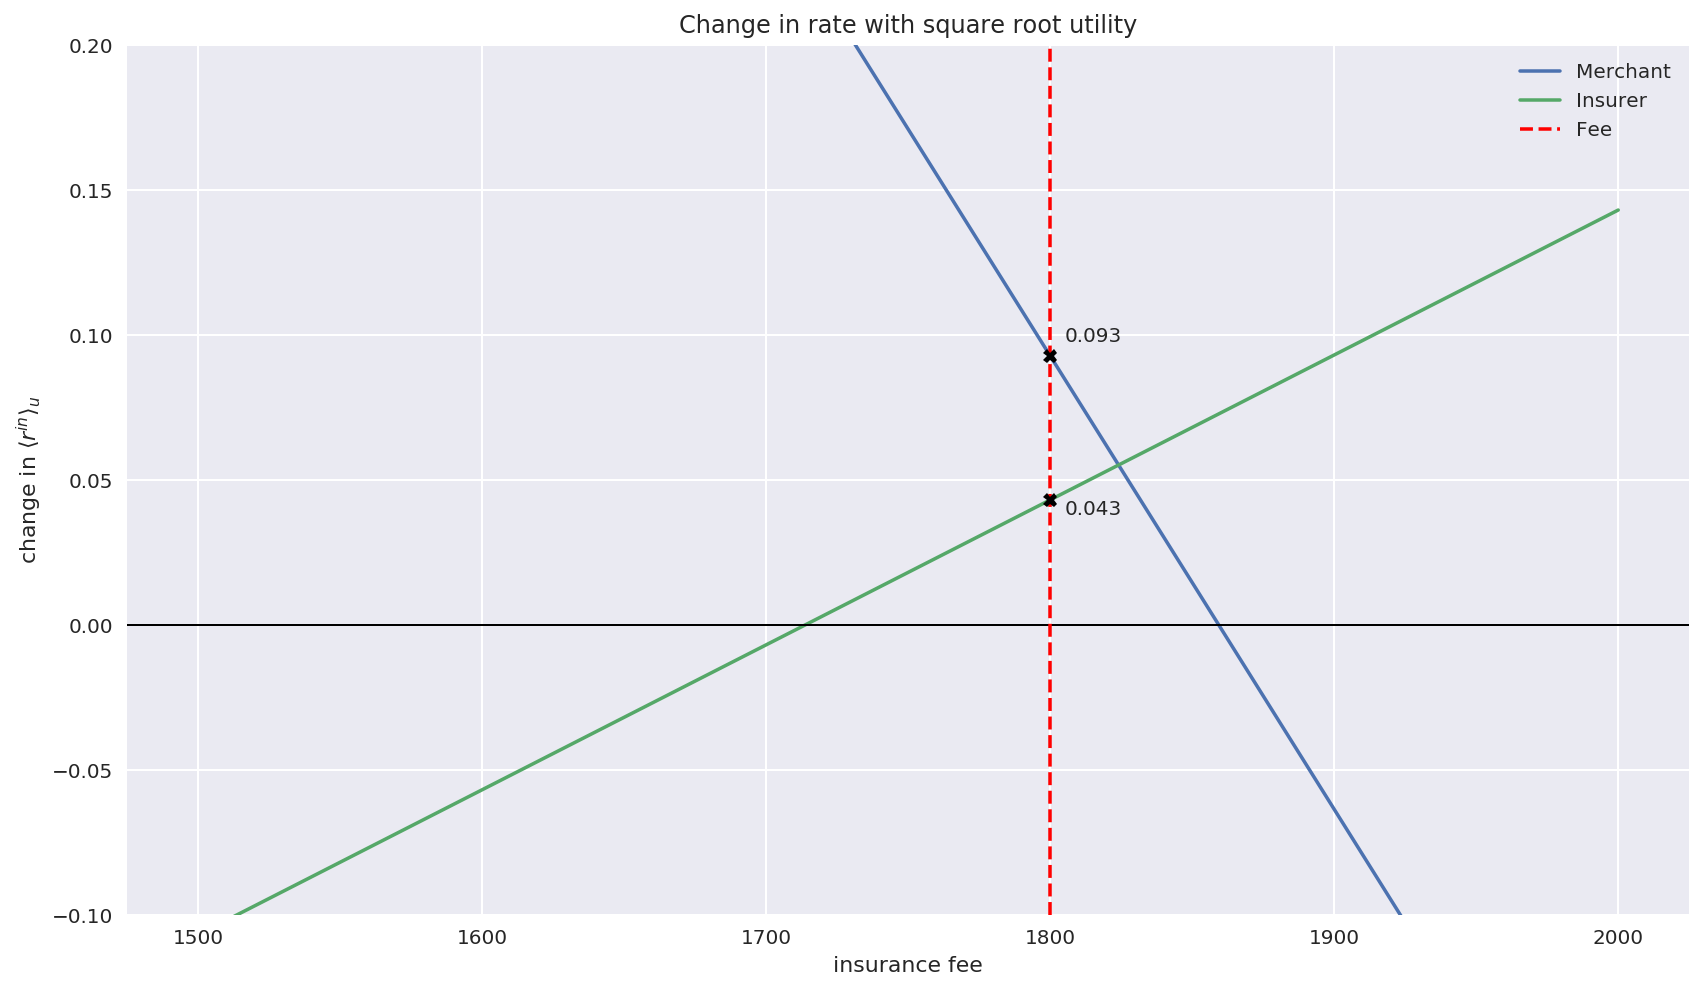

In [21]:
params = {"title": "Change in rate with square root utility",
          "ylabel": r"change in $\langle r^{in} \rangle_{u}$",
          "ylim": (0.2, -0.1)}

plot_deltas(delta_r_merchant_sqrt, delta_r_insurer_sqrt, params=params)

Notice that $\langle r_{u} \rangle$ is measured in _utility units_.

### Time averageing perspective

The paradigm discussed in the paper proposes that individuals make decisions that maximise the _time-average growth rate_ of their wealth.  
From page 17:
> The usual procedure for computing such a time average is to first transform wealth in such a way as to generate an ergodic observable and then compute the expectation value of that observable.

If we assume multiplicative dynamics, that is, the wealth of the merchant increases (or decreases) by a factor $r(n)$ each month, such that

$$W_{mer}(t + T\Delta t) = W_{mer}(t) \prod_{\tau=1}^{T} r(n_{\tau})$$

or equivalently  

$$W_{mer}(t + T\Delta t) = W_{mer}(t) \exp \left[ \ln(\sum_{\tau=1}^{T} r(n_{\tau})) \right]$$

then we can create an _ergodic observable_ by taking into consideration the relative changes in wealth $\frac{W_{mer}(t + \Delta t)}{W_{mer}(t)}$. The key property of this quantitiy is that the expected value (_the ensemble average_) is equal to the time-average as time tends to infinity.

$$\lim_{T\to\infty} \frac{1}{T \Delta t} \ln \left(\frac{W_{mer}(t + T \Delta t)}{W_{mer}} \right) = \frac{\langle \Delta \ln W_{mer} \rangle}{\Delta t} = \frac{\langle \Delta \ln W_{mer}(t + \Delta t) \rangle - \ln W_{mer}(t)}{\Delta t}$$

Under this paradigm, merchant and insurer should act in a way that maximises their rate of change in the _log_ of wealth. Note that this is a particular case of the utility paradigm, where both participants have log utilities.

We then have, under multiplicative dynamics, that the growth rate of the merchants wealth when _uninsured_ is

$$g_{mer}^{un} = (1 - p) \ln \left( \frac{W_{mer} + G}{W_{mer}} \right) + p \ln \left( \frac{W_{mer} - C}{W_{mer}} \right)$$

_With insurance_, the growth rate is

$$g_{mer}^{in} = \ln \left( \frac{W_{mer} + G - F}{W_{mer}} \right)$$

For the insurer, without selling

$$g_{ins}^{un} = 0$$

_With insurance_

$$g_{ins}^{in} = (1 - p) \ln \left( \frac{W_{ins} + F}{W_{ins}} \right) + p \ln \left( \frac{W_{ins} + F - L}{W_{ins}} \right)$$

In [23]:
def delta_g_merchant(fee):
    """Percent change in g_mer"""
    g_un = (1 - p) * np.log(W_mer + G) + p * np.log(W_mer - C) - np.log(W_mer)
    g_in = np.log(W_mer + G - fee) - np.log(W_mer)
    return (g_in - g_un) * 100

def delta_g_insurer(fee):
    """Percent change in g_ins"""
    g_un = 0
    g_in = (1 - p) * np.log((W_ins + fee) / W_ins) + p * np.log((W_ins + fee - L) / W_ins)
    return (g_in - g_un) * 100

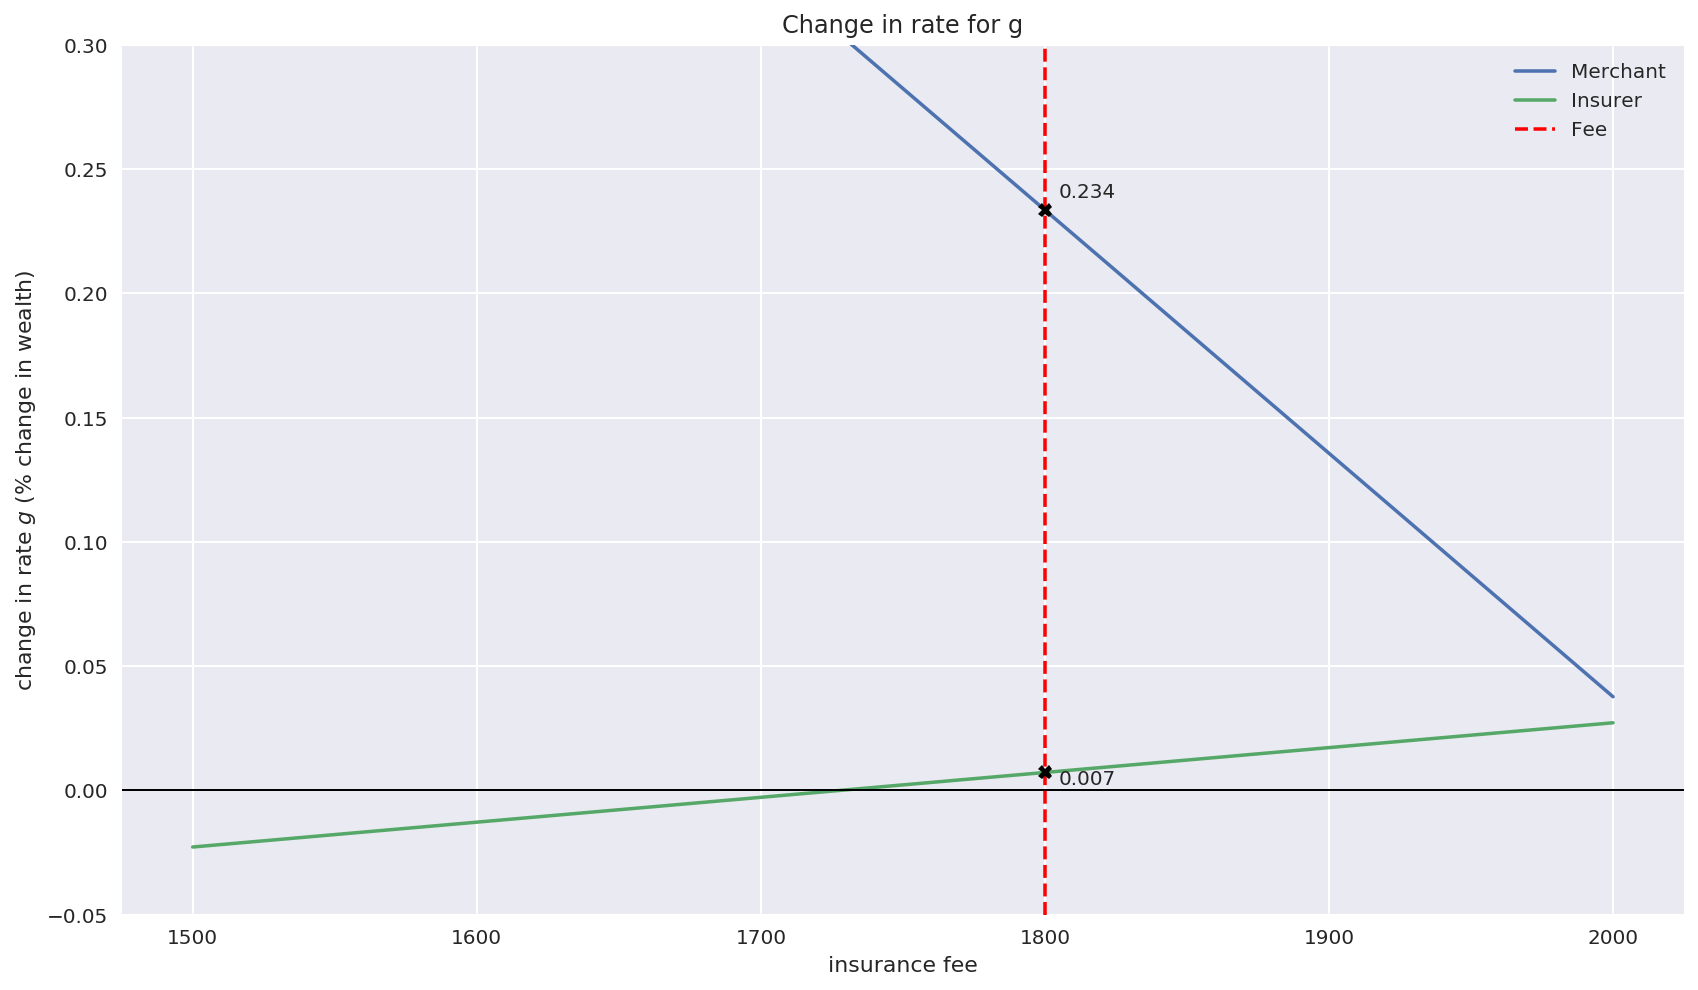

In [24]:
params = {"title": "Change in rate for g",
          "ylabel": r"change in rate $g$ (% change in wealth)",
          "ylim": (0.3, -0.05)}

plot_deltas(delta_g_merchant, delta_g_insurer, params=params)

Looking at the problem from the time-averaging perspective, we can conclude that both insurer and merchant should enter the contract.